In [156]:
import numpy as np 
from Neuronal_dynamics import *

In [157]:
E_l = 0
R_l = 1
t_ref = 0
tau = 10 
v_reset = 0
dt = 0.1
T_max = 10 #10 ms based intervals are being used for the simulation
I = 10 
v_0 = 0
v_th = 1 
t = 0
xs = []
ys = []
capacitance = tau/R_l*10
spike_count = 0
print("capacitance = ", capacitance)

capacitance =  100.0


In [158]:
slope = I/capacitance
movement = v_th/slope
predicted_spike_count = T_max/movement
print(predicted_spike_count)
print(movement)
print(slope)

1.0
10.0
0.1


In [159]:
if_1 = IF(v_th, capacitance, E_l, v_reset, t_ref)
x1s, y1s, spike_count_1 = if_1.simulate(T_max, I, dt)
spike_freq_1 = spike_count_1/T_max

spike count =  1
0.1


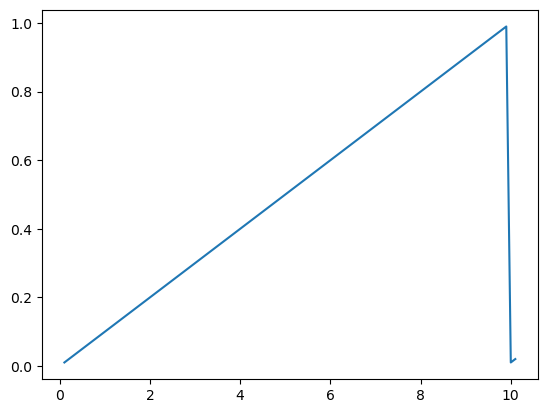

In [160]:
if (len(x1s) == len(y1s)):
    plt.plot(y1s, x1s)
    print("spike count = ", spike_count_1)
    print(spike_freq_1)
else:
    plt.plot(y1s[:-1], x1s)
    print("spike count = ", spike_count_1)
    print(spike_freq_1)

In [161]:
def transform_current_to_needed_spike(I, spikes_needed):
    return 10*spikes_needed

In [162]:
# now we need our three nurons that will simulate the Fibonacci sequence

A = IF(v_th, capacitance, E_l, v_reset, t_ref)
B = IF(v_th, capacitance, E_l, v_reset, t_ref)
A_delay = 0
I_A = 0
I_B = 10
B_delay = 10
T_simulation = 100
for t in range(T_simulation):
    if (t%20 == 0):
        print("t = ", t)
        # simulate A and B for the solid 10 seconds and then record the spike count at the end of the 10 seconds
        # that is present at C ( the post - synaptic neuron, then based on the spike counts needed, we transofmr B's current to 
        # look exactly like C's current and then  we make A's current look like B's)
        # then we repeat the simulation
        _,_, sc_A = A.simulate(10, I_A, dt)
        print("Spike count at t = {} to t = {} = {}".format(t, t+10, sc_A))
        ### Delay of 10 seconds here
        _,_, sc_B  = B.simulate(10, I_B, dt)
        print("Spike count at t = {} to t = {} = {}".format(t, t+10, sc_B))
        print("-----------Total spikes from t = {} to t = {} = {}---------------".format(t,t + 20,(sc_A + sc_B)))
        # transform B's current to create spikes equal to total spikes of C in that interval and A's to look like B's
        I_A = I_B
        I_B = transform_current_to_needed_spike(I_B, sc_A + sc_B)
        t = t + 20
        pass

t =  0
Spike count at t = 0 to t = 10 = 0
Spike count at t = 0 to t = 10 = 1
-----------Total spikes from t = 0 to t = 20 = 1---------------
t =  20
Spike count at t = 20 to t = 30 = 1
Spike count at t = 20 to t = 30 = 1
-----------Total spikes from t = 20 to t = 40 = 2---------------
t =  40
Spike count at t = 40 to t = 50 = 1
Spike count at t = 40 to t = 50 = 2
-----------Total spikes from t = 40 to t = 60 = 3---------------
t =  60
Spike count at t = 60 to t = 70 = 2
Spike count at t = 60 to t = 70 = 3
-----------Total spikes from t = 60 to t = 80 = 5---------------
t =  80
Spike count at t = 80 to t = 90 = 3
Spike count at t = 80 to t = 90 = 5
-----------Total spikes from t = 80 to t = 100 = 8---------------
